# <center>TensorFlow 101</center>
<center> Shan-Hung Wu & DataLab </center>
<center> Fall 2022 </center>

# Why TensorFlow?

TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications. TensorFlow has several benefits:
1. Easy model building
2. Robust ML production anywhere
3. Powerful experimentation for research

We are going to use TensorFlow as our framework in the following lectures. In this lab, you will learn how to install TensorFlow and get a better understanding by implementing a classical deep learning algorithm.

# Environment setup

## Software requirements

The following NVIDIA® software must be installed on your system:

- NVIDIA® GPU drivers —CUDA® 10.1 requires 418.x or higher.
- CUDA® Toolkit —TensorFlow supports CUDA® 10.1 (TensorFlow >= 2.1.0).
- CUPTI ships with the CUDA® Toolkit.
- cuDNN SDK 7.6 (see cuDNN versions).
- (Optional) TensorRT 6.0 to improve latency and throughput for inference on some models.

Please refer to TensorFlow website, [GPU Support](https://www.tensorflow.org/install/gpu) section, for more details and latest information. Please check the version of the abovementioned softwares carefully. There is a strict requirement between TensorFlow's version and NVIDIA® softwares'.

## Install CUDA with apt
This section shows how to install CUDA® 10 (TensorFlow >= 1.13.0) on Ubuntu 16.04 and 18.04. These instructions may work for other Debian-based distros.

### Ubuntu 18.04 (CUDA 10.1)
```bash
# Add NVIDIA package repositories
wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.1.243-1_amd64.deb
sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
sudo dpkg -i cuda-repo-ubuntu1804_10.1.243-1_amd64.deb
sudo apt-get update
wget http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
sudo apt install ./nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
sudo apt-get update

# Install NVIDIA driver
sudo apt-get install --no-install-recommends nvidia-driver-450
# Reboot. Check that GPUs are visible using the command: nvidia-smi

# Install development and runtime libraries (~4GB)
sudo apt-get install --no-install-recommends \
    cuda-10-1 \
    libcudnn7=7.6.5.32-1+cuda10.1  \
    libcudnn7-dev=7.6.5.32-1+cuda10.1


# Install TensorRT. Requires that libcudnn7 is installed above.
sudo apt-get install -y --no-install-recommends libnvinfer6=6.0.1-1+cuda10.1 \
    libnvinfer-dev=6.0.1-1+cuda10.1 \
    libnvinfer-plugin6=6.0.1-1+cuda10.1
```

### Ubuntu 16.04 (CUDA 10.1)
```bash
# Add NVIDIA package repositories
# Add HTTPS support for apt-key
sudo apt-get install gnupg-curl
wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-repo-ubuntu1604_10.1.243-1_amd64.deb
sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/7fa2af80.pub
sudo dpkg -i cuda-repo-ubuntu1604_10.1.243-1_amd64.deb
sudo apt-get update
wget http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64/nvidia-machine-learning-repo-ubuntu1604_1.0.0-1_amd64.deb
sudo apt install ./nvidia-machine-learning-repo-ubuntu1604_1.0.0-1_amd64.deb
sudo apt-get update

# Install NVIDIA driver
# Issue with driver install requires creating /usr/lib/nvidia
sudo mkdir /usr/lib/nvidia
sudo apt-get install --no-install-recommends nvidia-418
# Reboot. Check that GPUs are visible using the command: nvidia-smi

# Install development and runtime libraries (~4GB)
sudo apt-get install --no-install-recommends \
    cuda-10-1 \
    libcudnn7=7.6.4.38-1+cuda10.1  \
    libcudnn7-dev=7.6.4.38-1+cuda10.1


# Install TensorRT. Requires that libcudnn7 is installed above.
sudo apt-get install -y --no-install-recommends \
    libnvinfer6=6.0.1-1+cuda10.1 \
    libnvinfer-dev=6.0.1-1+cuda10.1 \
    libnvinfer-plugin6=6.0.1-1+cuda10.1
```

## Install CUDA with Anaconda

You can also install CUDA with Anaconda with following command:

```bash
conda install cudnn=7.6.5=cuda10.1_0
```

,which will install CUDA Toolkit and cuDNN SDK. After that, the only thing you have to install manually is Nvidia driver.
After installing CUDA Toolkit, you can check CUDA version with following command:

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


You can also check GPU utilization after installing GPU driver with following command:

In [2]:
!nvidia-smi

Tue Oct 11 15:39:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 470.63.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:19:00.0 Off |                  N/A |
|  0%   32C    P8    19W / 260W |      0MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 27%   

## Install TensorFlow 2

TensorFlow is tested and supported on the following 64-bit systems:
- Python 3.5–3.8
- Ubuntu 16.04 or later
- macOS 10.12.6 (Sierra) or later (no GPU support)
- Windows 7 or later 
- Raspbian 9.0 or later

We can simply install TensorFlow with Python's `pip` package manager with following commands:

```bash
# Requires the latest pip
pip install --upgrade pip

# Current stable release for CPU and GPU
pip install tensorflow
```

It is recommanded to install TensorFlow in a virtual environment, for more details, please refer to [Install TensorFlow with pip](https://www.tensorflow.org/install/pip).

To test whether TensorFlow is installed successfully and confirm that TensorFlow is using the GPU by executing following code.

In [3]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

TensorFlow Version: 2.9.1
Num GPUs Available:  4


## Google Colab
Installing all dependencies of TensorFlow is a pain in the ass. Google Colab provides a Jupyter notebook environment that requires no setup with free GPU. The types of GPUs that are available in Colab vary over time. The GPUs available in Colab often include Nvidia
- K80
- T4
- P4
- P100

There is no way to choose what type of GPU you can connect to in Colab at any given time.

You can easily access Google Colab via your Google account and play around with TensorFlow. For example, [TensorFlow 2 quickstart for beginners](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

However, there are few constraints when using Google Colab:
- 12 hours lifetimes limit
- Various available GPU memory

Google announced a new service called [Colab Pro](https://colab.research.google.com/signup) ($9.99/month) at the beginning of 2020, which provides faster GPUs, longer runtimes, and more memory compared with Colab. Other choices for acquiring GPU is to use [Cloud GPU](https://cloud.google.com/gpu) and [Cloud TPU](https://cloud.google.com/tpu), but they are more expensive. As a result, we highly recommend you to use TensorFlow on your own machine, while colab is still a good place for you to start with.

# TensorFlow 2 quickstart
Originally developed by Google Brain, TensorFlow is an open source library which provides a variety of functions and classes used to conduct machine learning algorithm.

TensorFlow has various benefits, including
- Python API
- Portability: can be distributed on multiple CPUs, GPUs, or TPUs as well as on mobile devices
- Flexibility: can run on different devices e.g. Raspberry Pi, Android, iOS, Windows, Linux
- Visualization: visualize the training process via TensorBoard
- Checkpoints: manage trained models
- Auto-differentiation
- Large community

Later on, we will try to:
- Load dataset via `tf.keras.datasets`
- Build model via high-level *Sequential API*
- Build model via more flexible *Functional API*
- Build model via fully-customizable *Model Subclassing*
- Boost performance by `tf.function`
- Customize gradient flow by `tf.custom_gradient`

## Limit GPU memory growth
By default, TensorFlow maps nearly all of the GPU memory of all GPUs (subject to `CUDA_VISIBLE_DEVICES`) visible to the process. This is done to more efficiently use the relatively precious GPU memory resources on the devices by reducing memory fragmentation. To limit TensorFlow to a specific set of GPUs we use the `tf.config.experimental.set_visible_devices` method.

In some cases it is desirable for the process to only allocate a subset of the available memory, or to only grow the memory usage as is needed by the process. One option is to turn on memory growth by calling `tf.config.experimental.set_memory_growth`, which attempts to allocate only as much GPU memory as needed for the runtime allocations: it starts out allocating very little memory, and as the program gets run and more GPU memory is needed, we extend the GPU memory region allocated to the TensorFlow process.

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the first GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

4 Physical GPUs, 1 Logical GPUs


## Load dataset via tf.keras.dataset
Currently, [`tf.keras.dataset`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/datasets) supports 7 datasets. Including:
- `mnist` module: MNIST handwritten digits dataset.
- `cifar10` module: CIFAR10 small images classification dataset.
- `cifar100` module: CIFAR100 small images classification dataset.
- `fashion_mnist` module: Fashion-MNIST dataset.
- `imdb` module: IMDB sentiment classification dataset.
- `boston_housing` module: Boston housing price regression dataset.
- `reuters` module: Reuters topic classification dataset.

In this lab, we will use [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to demo how to build a neural network. MNIST contains 70,000 images of hand-written digits, 60,000 for training while 10,000 for testing, each $28×28$ pixels, in greyscale with pixel-values from 0 to 255.

In [6]:
# Helper function
def show_images(image, num_row=2, num_col=5):
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num_row*num_col):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(image[i], cmap='gray', vmin=0, vmax=1)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Load and prepare the MNIST dataset. Convert the samples from integers to floating-point numbers:

In [7]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Training data: (60000, 28, 28)
Test data: (10000, 28, 28)


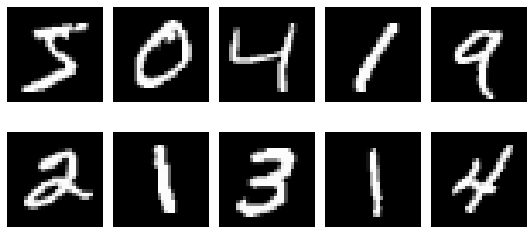

In [8]:
print("Training data: {}".format(x_train.shape))
print("Test data: {}".format(x_test.shape))
show_images(x_train)

## Build model via Sequential API
### When to use?
A `Sequential API` is the simplest way to build a model, which is appropriate for **a plain stack of layers** where each layer has **exactly one input tensor and one output tensor**.

Build the [`tf.keras.Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model by stacking layers. Choose an optimizer and loss function for training:

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

For each example the model returns a vector of "logits" or "log-odds" scores, one for each class.

In [10]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.11171019, -0.47011006, -0.481782  , -0.05107722,  0.11246532,
         1.1753833 , -0.37382746, -0.34236422, -0.21776126,  0.66296977]],
      dtype=float32)

The [`tf.nn.softmax`](https://www.tensorflow.org/api_docs/python/tf/nn/softmax) function converts these logits to "probabilities" for each class:

In [11]:
tf.nn.softmax(predictions).numpy()

array([[0.07717101, 0.05392661, 0.05330085, 0.08199489, 0.09656338,
        0.27953222, 0.05937699, 0.06127489, 0.06940597, 0.16745321]],
      dtype=float32)

Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

The [`losses.SparseCategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) loss takes a vector of logits and a True index and returns a scalar loss for each example.

In [12]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.log(1/10) ~= 2.3`.

In [13]:
loss_fn(y_train[:1], predictions).numpy()

1.2746377

In [14]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

The [`Model.summary`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary) method prints a string summary of the network, which is quite useful to examining model architecture before training.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


The [`Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method adjusts the model parameters to minimize the loss:

In [16]:
model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2956 - accuracy: 0.9134
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1437 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1066 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0857 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0738 - accuracy: 0.9764


The [`Model.evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) method checks the models performance, usually on a "Validation-set" or "Test-set".

In [17]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0744 - accuracy: 0.9762 - 837ms/epoch - 3ms/step


[0.07441160082817078, 0.9761999845504761]

The image classifier is now trained to ~98% accuracy on this dataset.

In [18]:
# Destroys the current TF graph and creates a new one.
tf.keras.backend.clear_session()

## Build model via Functional API
### When to use?
The Keras *Functional API* is a way to create models that are **more flexible** than the `tf.keras.Sequential` API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So the functional API is a way to build *graphs of layers*.

Consider the following model:

```python
(input: (28, 28)-dimensional vectors)
       ↧
[Flatten]
       ↧
[Dense (128 units, relu activation)]
       ↧
[Dropout]
       ↧
[Dense (10 units, softmax activation)]
       ↧
(output: logits of a probability distribution over 10 classes)
```

This is a basic graph with four layers. To build this model using the functional API, start by creating an input node:

In [19]:
inputs = tf.keras.Input(shape=(28, 28))

The shape of the data is set as a 784-dimensional vector. The batch size is always omitted since only the shape of each sample is specified. The `inputs` that is returned contains information about the shape and `dtype` of the input data that you feed to your model.

In [20]:
print("Shape:", inputs.shape)
print("dtype:", inputs.dtype)

Shape: (None, 28, 28)
dtype: <dtype: 'float32'>


You create a new node in the graph of layers by calling a layer on this `inputs` object. The "layer call" action is like drawing an arrow from "inputs" to this layer you created. You're "passing" the inputs to the `dense` layer, and you get `x` as the output.

Let's add a few more layers to the graph of layers:

In [21]:
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10)(x)

At this point, you can create a Model by specifying its inputs and outputs in the graph of layers:

In [22]:
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Training, evaluation, and inference work exactly in the same way for models built using the functional API as for `Sequential` models.

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 0.3659 - accuracy: 0.8962 - val_loss: 0.1813 - val_accuracy: 0.9498
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.1762 - accuracy: 0.9479 - val_loss: 0.1275 - val_accuracy: 0.9638
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.1332 - accuracy: 0.9612 - val_loss: 0.1111 - val_accuracy: 0.9680
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.1077 - accuracy: 0.9683 - val_loss: 0.0984 - val_accuracy: 0.9715
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0900 - accuracy: 0.9737 - val_loss: 0.0944 - val_accuracy: 0.9723
313/313 - 1s - loss: 0.0862 - accuracy: 0.9745 - 759ms/epoch - 2ms/step
Test loss: 0.08624877035617828
Test accuracy: 0.9745000004768372


In [24]:
# Destroys the current TF graph and creates a new one.
tf.keras.backend.clear_session()

## Build model via Model Subclassing
### When to use?
The final method to implement a model architecture is called *Model Subclassing*. Model subclassing is **fully-customizable** and enables you to **implement your own custom forward-pass of the model**. However, this flexibility and customization comes at a cost — **model subclassing is way harder to utilize than the Sequential API or Functional API**.

So, if the model subclassing method is so hard to use, why bother utilizing it all?

Exotic architectures or custom layer/model implementations, **especially those utilized by researchers**, can be extremely challenging, if not impossible, to implement using the standard Sequential or Functional APIs. Instead, researchers wish to have control over every nuance of the network and training process — and that’s exactly what model subclassing provides them.

Use [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) to batch and shuffle the dataset:

In [25]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

Build the `tf.keras` model using the Keras [model subclassing API](https://www.tensorflow.org/guide/keras/custom_layers_and_models):

In [26]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.d1 = tf.keras.layers.Dense(128, activation='relu')
        self.d2 = tf.keras.layers.Dense(10)

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        x = self.dropout(x)
        return self.d2(x)

In [27]:
# Create an instance of the model
model = MyModel()
model.build(input_shape=(None, 28, 28))
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           multiple                  0         
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  100480    
                                                                 
 dense_1 (Dense)             multiple                  1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Choose an optimizer and loss function for training.

In [28]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

Select metrics to measure the loss and the accuracy of the model. These metrics accumulate the values over epochs and then print the overall result.

In [29]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

To train the model, we can use [`tf.GradientTape`](https://www.tensorflow.org/api_docs/python/tf/GradientTape) to record operations for automatic differentiation. 

One of the most important and powerful features of deep learning framework is **automatic differentiation and gradients**. As we can see in [Neural Networks from Scratch](https://nthu-datalab.github.io/ml/labs/10_TensorFlow101/10_NN-from-Scratchs.html), building neural networks manually requires strong knowledge of backpropagation algorithm, where we have to calculate the derivative of everything. It is interesting as we don't have too many operations or the model architecture is relatively simple. When we have tens of millions of operations or much more complicated architecture, computing gradients for each weight will be a nightmare.

TensorFlow provides the `tf.GradientTape` API for **automatic differentiation**; that is, computing the gradient of a computation with respect to some inputs, usually `tf.Variables`, which is useful for implementing machine learning algorithms such as backpropagation for training neural networks. In short, you can regard `tape.gradient(loss, model.trainable_variable)` as 

$$\frac{\partial{L}}{\partial{W_{i,j}}}$$

For more details, please refer to [Introduction to Gradients and Automatic Differentiation](https://www.tensorflow.org/guide/autodiff).

In [30]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

In [31]:
@tf.function
def test_step(images, labels):
    # training=False is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

Notice that the function decorated by [`tf.function`](https://www.tensorflow.org/api_docs/python/tf/function) will be compiled into a callable TensorFlow graph automatically. This allows the TensorFlow runtime to apply optimizations and exploit parallelism to boost computation performance. We will talk more about `tf.function` in the later section.

Let's train and evaluate the model first.

In [32]:
EPOCHS = 5

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)
        
    template = 'Epoch {:0}, Loss: {:.4f}, Accuracy: {:.4f}, Test Loss: {:.4f}, Test Accuracy: {:.4f}'
    print (template.format(epoch+1,
                           train_loss.result(),
                           train_accuracy.result()*100,
                           test_loss.result(),
                           test_accuracy.result()*100))

Epoch 1, Loss: 0.2975, Accuracy: 91.5217, Test Loss: 0.1409, Test Accuracy: 95.7200
Epoch 2, Loss: 0.1433, Accuracy: 95.7333, Test Loss: 0.1063, Test Accuracy: 96.7700
Epoch 3, Loss: 0.1091, Accuracy: 96.7350, Test Loss: 0.0889, Test Accuracy: 97.2800
Epoch 4, Loss: 0.0888, Accuracy: 97.2033, Test Loss: 0.0842, Test Accuracy: 97.5000
Epoch 5, Loss: 0.0760, Accuracy: 97.6233, Test Loss: 0.0718, Test Accuracy: 97.8000


### Sequential API, Functional API, and Model Subclassing
<img src="./figs/tf_model.png" width="500"/>
Should you use the Keras functional API to create a new model, or just subclass the Model class directly? In general, the functional API is higher-level, easier and safer, and has a number of features that subclassed models do not support. However, model subclassing provides greater flexibility when building models that are not easily expressible as directed acyclic graphs of layers. For example, you could not implement a Tree-RNN with the functional API and would have to subclass Model directly.

Choosing between the functional API or Model subclassing isn't a binary decision that restricts you into one category of models. All models in the `tf.keras` API can interact with each other, whether they're `Sequential` models, functional models, or subclassed models that are written from scratch.

For an in-depth look at the differences between the functional API and model subclassing, read [What are Symbolic and Imperative APIs in TensorFlow 2.0?](https://blog.tensorflow.org/2019/01/what-are-symbolic-and-imperative-apis.html).

## Better performance with tf.function

In TensorFlow 2, **eager execution** is turned on by default. The user interface is intuitive and flexible (running one-off operations is much easier and faster), but this can come at the expense of performance and deployability.

You can use [`tf.function`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/function) to make graphs out of your programs. It is a transformation tool that creates Python-independent dataflow graphs out of your Python code. Here we will briefly introduce you how `tf.function` works under the hood so you can use it effectively.

The main takeaways and recommendations are:

- Debug in eager mode, then decorate with `@tf.function`.
- Don't rely on Python side effects like object mutation or list appends.
- `tf.function` works best with TensorFlow ops; NumPy and Python calls are converted to constants.

Let's create two function with same operation. `f_eager` and `f_graph` represent the functions run in **eager** and **graph** mode, respectively.

In [33]:
def f_eager(x, y):
    for i in tf.range(100000):
        _ = tf.reduce_mean(tf.multiply(x ** 2, 3) + y)
    return tf.reduce_mean(tf.multiply(x ** 2, 3) + y)

@tf.function
def f_graph(x, y):
    for i in tf.range(100000):
        _ = tf.reduce_mean(tf.multiply(x ** 2, 3) + y)
    return tf.reduce_mean(tf.multiply(x ** 2, 3) + y)

In [34]:
x = tf.constant([[2.0, 3.0]])
y = tf.constant([[3.0, -2.0]])

In [35]:
# `f_eager` and `f_graph` return same values, but `f_graph` is executed as a TensorFlow graph.
assert f_eager(x, y).numpy() == f_graph(x, y).numpy()

In [36]:
%time _ = f_eager(x, y)

CPU times: user 23.8 s, sys: 0 ns, total: 23.8 s
Wall time: 23.7 s


In [37]:
%time _ = f_graph(x, y)

CPU times: user 1.56 ms, sys: 0 ns, total: 1.56 ms
Wall time: 937 µs


As you can see, functions decorated with `@tf.function` can be faster than eager code, especially for graphs with many small ops. But for graphs with a few expensive ops (like convolutions), you may not see much speedup.

If your code uses multiple functions, you don't need to annotate them all - any functions called from an annotated function will also run in graph mode. Therefore, you only need to decorate the outermost function only.

### Debugging
In general, debugging code is easier in eager mode than inside `tf.function`. You should ensure that your code executes error-free in eager mode before decorating with `tf.function`. To assist in the debugging process, you can call [`tf.config.run_functions_eagerly(True)`](https://www.tensorflow.org/api_docs/python/tf/config/run_functions_eagerly) to globally disable and reenable tf.function.

When tracking down issues that only appear within tf.function, here are some tips:

- Plain old Python `print` calls only execute during tracing, helping you track down when your function gets (re)traced.
- [`tf.print`](https://www.tensorflow.org/api_docs/python/tf/print) calls will execute every time, and can help you track down intermediate values during execution.
- [`tf.debugging.enable_check_numerics`](https://www.tensorflow.org/api_docs/python/tf/debugging/enable_check_numerics) is an easy way to track down where NaNs and Inf are created.
- pdb can help you understand what's going on during tracing. (Caveat: PDB will drop you into AutoGraph-transformed source code.)

### Python side effects
Python side effects like printing, appending to lists, and mutating globals only happen the first time you call a `Function` with a set of inputs. Afterwards, the traced `tf.Graph` is reexecuted, without executing the Python code.

The general rule of thumb is to only use Python side effects to debug your traces. Otherwise, TensorFlow ops like `tf.Variable.assign`, `tf.print`, and `tf.summary` are the best way to ensure your code will be traced and executed by the TensorFlow runtime with each call.

In [38]:
@tf.function
def f(x):
    print("Traced with", x)
    tf.print("Executed with", x)

In [39]:
f(1)
f(1)
f(2)

Traced with 1
Executed with 1
Executed with 1
Traced with 2
Executed with 2


As we can see, `print` function works unexpectedly, while `tf.print` calls execute every time. Another gotcha we can see below is mutating globals.

In [40]:
g = 0

@tf.function
def mutate_globals(x):
    return x + g

# tf.function captures the value of the global during the first run
print("First call: ", mutate_globals(tf.constant(1)))
g = 10  # Update the global

# Subsequent runs may silently use the cached value of the globals
print("Second call: ", mutate_globals(tf.constant(2)))

# tf.function re-runs the Python function when the type or shape of the argument changes
# This will end up reading the latest value of the global
print("Third call, different type: ", mutate_globals(tf.constant([4.])))

First call:  tf.Tensor(1, shape=(), dtype=int32)
Second call:  tf.Tensor(2, shape=(), dtype=int32)
Third call, different type:  tf.Tensor([14.], shape=(1,), dtype=float32)


In addition, many Python features, such as generators and iterators, rely on the Python runtime to keep track of state. In general, while these constructs work as expected in eager mode, many unexpected things can happen inside a `Function`.

For more details about `tf.function` and `Autograph`, including how conditionals and loops work and how to trace code and debug inside `tf.function`, please refer to [tutorial](https://www.tensorflow.org/guide/function) and [video](https://www.youtube.com/watch?v=Up9CvRLIIIw&ab_channel=TensorFlow).

## Customize gradient flow by tf.custom_gradient
[`tf.custom_gradient`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/custom_gradient) is a decorator to define a function with a custom gradient. This decorator allows fine grained control over the gradients of a sequence for operations. This may be useful for multiple reasons, including providing a more efficient or numerically stable gradient for a sequence of operations.

For example, consider the following function that commonly occurs in the computation of cross entropy and log likelihoods:
$$y=\log_e(1+e^x)$$

In [41]:
def log1pexp(x):
    return tf.math.log(1 + tf.exp(x))

The derivative of y is:

$$\frac{dy}{dx}=\frac{e^x}{1+e^x}=1-\frac{1}{1+e^x}$$

Theoretically, if x = 100, `dy/dx` should be 1. However, due to numerical instability, the gradient this function evaluated at x=100 is NaN. For example:

In [42]:
x = tf.constant(100.)
with tf.GradientTape() as g:
    g.watch(x)
    y = log1pexp(x)
dy = g.gradient(y, x) # Will be evaluated as NaN
print("dy/dx =", dy.numpy())

dy/dx = nan


The gradient expression can be analytically simplified to provide numerical stability:

In [43]:
@tf.custom_gradient
def log1pexp(x):
    e = tf.exp(x)
    def grad(dy):
        return dy * (1 - 1 / (1 + e))
    return tf.math.log(1 + e), grad

In [44]:
x = tf.constant(100.)
with tf.GradientTape() as g:
    g.watch(x)
    y = log1pexp(x)
dy = g.gradient(y, x) # Will be evaluated as 1.0
print("dy/dx =", dy.numpy())

dy/dx = 1.0


# Reference
- [TensorFlow](https://www.tensorflow.org/)
- [3 ways to create a Keras model with TensorFlow 2.0](https://www.pyimagesearch.com/2019/10/28/3-ways-to-create-a-keras-model-with-tensorflow-2-0-sequential-functional-and-model-subclassing/)